# Metricas de rendimiento
---

- **Taller 2**: Regresion 'lineal'
- **Fecha de entrega**: 13 de Marzo de 2024.


In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A continuación encontrará datos de crecimiento de E.coli (para más de crecimiento bacteriano, consulte: https://es.wikipedia.org/wiki/Crecimiento_bacteriano). Tendrá como variables independientes el tiempo en que fue tomada cada muestra y su volumen celular, por otra parte, el conteo celular para cada punto será la variable dependiente. Realice una regresión que le permita estimar la cantidad de células en cualquier momento.

In [187]:
data = pd.read_csv('content/E.coli growth data.csv')
data

,Time(h),Cell volume(nL),Cell counts
0,0.000,-0.00000,18103.601734
1,0.001,-0.00001,9026.463388
2,0.002,-0.00002,16774.913950
3,0.003,-0.00003,13506.920275
4,0.004,-0.00004,12335.411411
...,...,...,...
3495,3.495,-0.03495,32454.193821
3496,3.496,-0.03496,35844.827506
3497,3.497,-0.03497,35970.365705
3498,3.498,-0.03498,33906.080173


#  1. Explore el conjunto de datos

Grafique la variable dependiente respecto a las independientes, ¿la tendencia es lineal?

pista: ambas respuestas son correctas



## $$\alpha = e^t$$

## $$N(t) = \beta \cdot \alpha$$

Teniendo esto en cuenta se decide transformar los datos para modelar la funcion de crecimiento.

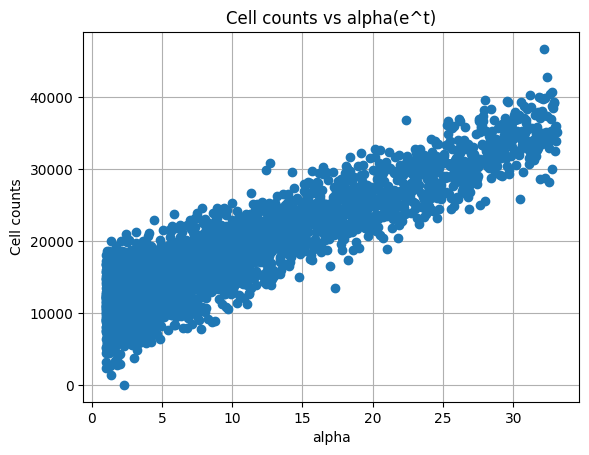

In [241]:
beta  = data['Cell volume(nL)'].to_numpy() # tasa de cambio de volumen celular
y = data['Cell counts'].to_numpy() # numero de celulas

# Transformar Time(h) a alpha
alpha = []
# alpha = np.zeros(len(data['Time(h)']))
for element in data['Time(h)'].to_numpy():
    # print(element)
    e_t = np.exp(element)
    alpha.append(e_t)

alpha = np.array(alpha, dtype=np.float64)


# Graficar
plt.title('Cell counts vs alpha(e^t)')
plt.plot(alpha, y, 'o')
plt.xlabel('alpha')
plt.ylabel('Cell counts')
plt.grid(True)



Se ve una clara tendencia lineal en los datos

#  2. Separe su conjunto de datos

Realice un hold-out de 70%-30% (No use Sklearn).Grafique ambas conjuntos. ¿La tendencia es igual en ambos casos?

**Este punto solo será válido si se considera el balanceo durante el particionamiento.**


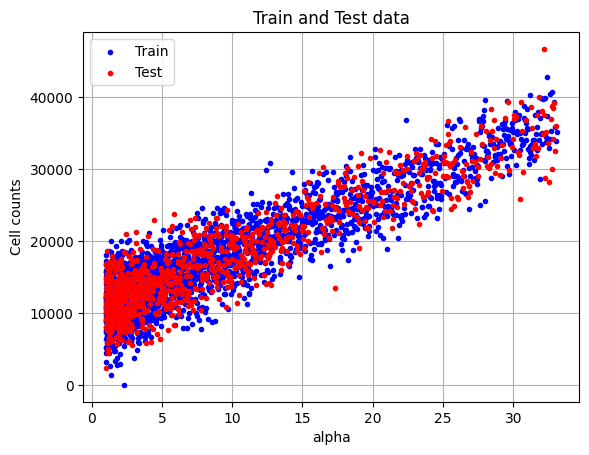

In [273]:
data_size = len(y)
index =np.arange(0, data_size, 1)
np.random.seed(43)
np.random.shuffle(index)
seventy_percent = int(data_size*0.7)
train_index = index[0:seventy_percent]
test_index = index[seventy_percent:]

X_train = alpha[train_index]
X_test = alpha[test_index]
y_train = y[train_index]
y_test = y[test_index]


plt.title('Train and Test data')
plt.xlabel('alpha')
plt.ylabel('Cell counts')
plt.scatter(X_train, y_train, label='Train', color='blue', marker='.', zorder=3)
plt.scatter(X_test, y_test, label='Test', color='red', marker='.', zorder=3)
plt.legend()
plt.grid(True)

# 3. Proponga un modelo

Proponga un modelo para la estimación de crecimiento celular, Justifique su elección.

**recuerde los 5 criterios de Gauss-Markov, ¿su modelo lo cumple?**

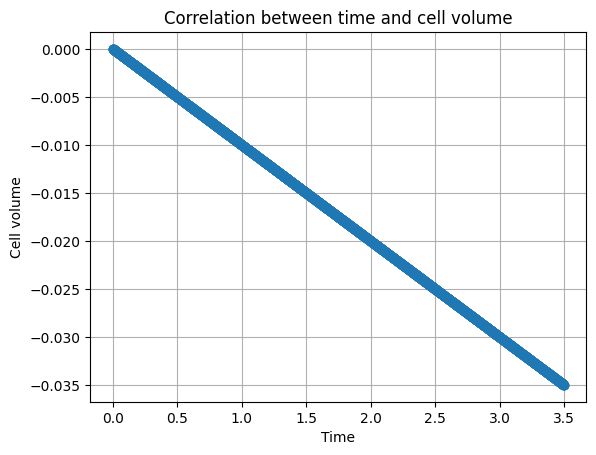

In [282]:
time = data['Time(h)'].to_numpy()
cell_volume = data['Cell volume(nL)'].to_numpy()

# Correlacion entre las variables
plt.title('Correlation between time and cell volume')
plt.scatter(time, cell_volume , zorder=3)
plt.xlabel('Time')
plt.ylabel('Cell volume')
plt.grid(True)



# 4. Evalue su modelo

Seleccione una métrica de evaluación, justifique su respuesta. ¿Esta métrica demuestra que su modelo obtiene un buen ajuste?